Step 1. Setting up dependencies and then loading the Input image/s

In [1]:
# import dependencies 
import torch
import torchvision
import sys
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
import os 
os.environ ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [21]:
# OPTIONAL: show annotations on image
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))    

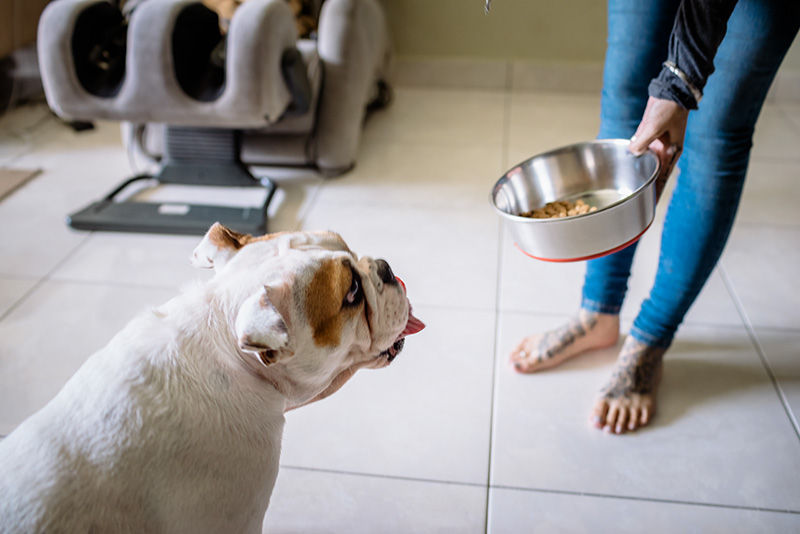

In [4]:
from IPython.display import Image
Image('images/dog.jpg')

Step 2. Segment Anything Output

In [5]:
# provide SAM model to the mask generator class
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam_checkpoint = "../sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

mask_generator = SamAutomaticMaskGenerator(sam)

In [6]:
import torch
from PIL import Image
import open_clip

model, _, transform = open_clip.create_model_and_transforms(
  model_name="coca_ViT-L-14",
  pretrained="mscoco_finetuned_laion2B-s13B-b90k"
)

In [7]:
# get the masks for the image
image = cv2.imread('images/dog.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# run automatic mask generation
masks = mask_generator.generate(image)

In [ ]:
# Check all masks if they have a 
length_masks = len(masks)
for mask in length_masks: 
  # crop the image AKA get the bounding box
  bbox_mask = masks[mask]['bbox']
  # ask OpenClip "This is a photo of what?"
  im = Image.open("images/dog.jpg").convert("RGB")
  im = transform(im).unsqueeze(0)
  with torch.no_grad(), torch.cuda.amp.autocast():
    generated = model.generate(im)

  print(open_clip.decode(generated[0]).split("<end_of_text>")[0].replace("<start_of_text>", ""))

In [11]:
# Check all masks if they have a 
length_masks = len(masks)
print(length_masks)


66


In [40]:
im = Image.open("images/dog.jpg")
bbox_xywh = masks[0]['bbox']
print(bbox_xywh)

# Convert the bounding box to LURD format
bbox_lurd = [bbox_xywh[0], bbox_xywh[1], bbox_xywh[0] + bbox_xywh[2], bbox_xywh[1] + bbox_xywh[3]]
print(bbox_lurd)

[0, 223, 422, 309]
[0, 223, 422, 532]


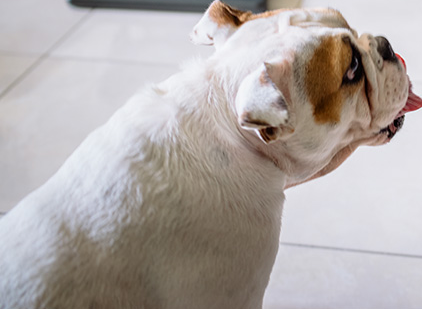

In [41]:
cropped_image = im.crop(bbox_lurd) # Crop the image using the bounding box coordinates
cropped_image.convert("RGB")

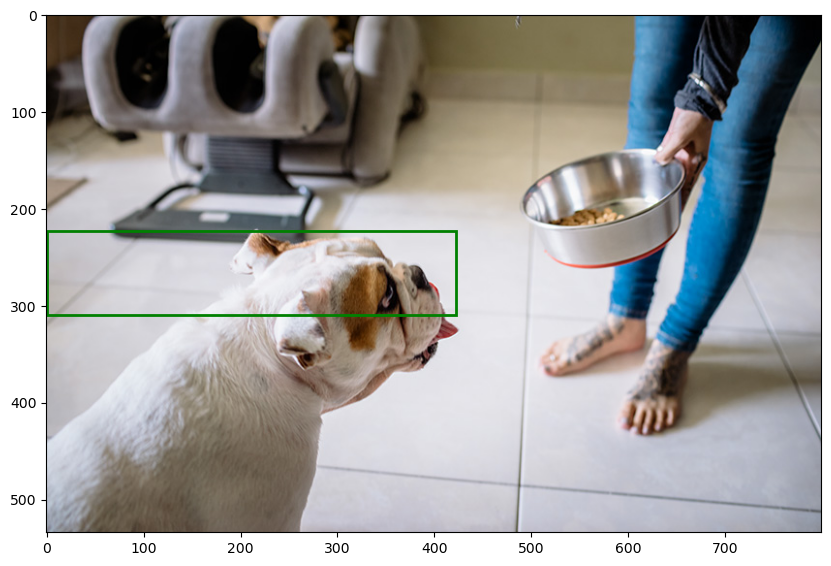

In [23]:
plt.figure(figsize=(10, 10))
plt.imshow(image)
show_box(bbox_mask, plt.gca())

In [26]:
for mask in range(length_masks): 
  print(mask)
  # Define the bounding box coordinates
  bbox_mask = masks[mask]['bbox']
  # Ask OpenClip "This is a photo of what?"
  #cropped_image = im.crop(bbox_mask) # Crop the image using the bounding box coordinates
  #cropped_image.convert("RGB")
  print(bbox_mask)

0
[0, 223, 422, 309]
1
[0, 87, 799, 445]
2
[582, 0, 217, 347]
3
[490, 139, 169, 122]
4
[72, 2, 54, 94]
5
[490, 488, 309, 44]
6
[263, 467, 221, 65]
7
[648, 0, 151, 108]
8
[0, 0, 50, 56]
9
[381, 0, 418, 66]
10
[510, 0, 289, 434]
11
[0, 55, 15, 58]
12
[599, 0, 79, 137]
13
[0, 44, 43, 68]
14
[0, 169, 40, 29]
15
[281, 47, 30, 69]
16
[0, 26, 422, 506]
17
[235, 287, 53, 77]
18
[202, 0, 40, 34]
19
[381, 0, 225, 62]
20
[172, 3, 52, 97]
21
[158, 203, 31, 11]
22
[381, 0, 418, 99]
23
[202, 0, 121, 37]
24
[628, 96, 60, 103]
25
[581, 243, 55, 70]
26
[484, 0, 6, 14]
27
[510, 308, 108, 64]
28
[0, 0, 799, 98]
29
[649, 0, 88, 109]
30
[37, 0, 273, 234]
31
[520, 199, 76, 19]
32
[287, 0, 35, 37]
33
[190, 222, 63, 49]
34
[717, 261, 82, 179]
35
[311, 0, 77, 175]
36
[67, 176, 208, 59]
37
[68, 121, 25, 10]
38
[302, 367, 54, 37]
39
[0, 277, 35, 38]
40
[398, 306, 26, 33]
41
[0, 0, 49, 111]
42
[0, 103, 127, 63]
43
[363, 79, 30, 44]
44
[663, 60, 39, 42]
45
[210, 36, 15, 32]
46
[244, 0, 143, 175]
47
[12, 0, 9, 49]


Step 3. Crop images for each mask

Step 4. Use CLIP to label the mask : clip_label

Step 5. Compare clip_label to COCO

In [ ]:
# If clip_label in COCO: Compare the prediction with ground truth Score using mAP -> get ground score
# Else: Ignore